<img src="https://sites.google.com/a/pythonpredictions.com/wiki/_/rsrc/1484769080787/home/pythongrey%20large.png?height=58&width=200" height="150" width="150" align="right">

# COBRA 1.0 as a Python library
----------------------------------------------------------------------------------------------------------
**Autor**: Jan Benisek

**Date**: 05/03/2018

**Purpose**: Show transformed COBRA 1.0 code into Python library for easy use

**Requirements**: Python 3.6 (Conda distribution), COBRA library (to be specified)

----------------------------------------------------------------------------------------------------------

**BEFORE YOU START**
  * The dataset must contains a column name _ID_, which is a unique identifier of a row
  * The column with target must be named _TARGET_
  * .csv should be comma delimited (although Pandas will try to guess the sepator)
  * Make sure you have the latest version of COBRA (follow the instructions on the main page of the repository)
  
  
## List of content
  * Data transformation
  * Univariate selection
  * Model building
  * Model comparison

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#####################
import cobra.cobra as c
#####################

data_path = 'C:/Local/pers/Documents/GitHub/COBRA/datasets/data.csv'
data_types_path = 'C:/Local/pers/Documents/GitHub/COBRA/datasets/data_types.csv'

## <font color='blue'>Data transformation</font>
The first step is, as in the original version, to import and process the data.

In [2]:
build = c.COBRA(data_path,            #Path to .csv file which contains the data
                data_types_path,      #Path to .csv files which contains the metadata
                partition_train=0.5,  #Size of training set as int <0;1>
                partition_select=0.3, #Size of selection set as int <0;1>
                partition_valid=0.2,  #Size of validation set as int <0;1>
                sampling_1=1,         #Size of sampling of target class (ie. 0.5 = take 50% of 1s)
                sampling_0=1,         #Size of sampling of non-target class (ie. 0.5 = take 50% of 0s)
                discret_nbins=5,      #Number of bins when binning continuous variables
                regroup_sign=0.001,   #Threshold for regrouping cat. variables (p-value)
                rseed=0)              #Random seed for reproduction
df_transformed = build.transform()

Below you can see first 10 rows of the transformed dataframe.

In [3]:
df_transformed.head(n=10)

,ID,TARGET,PARTITION,B_age,B_fnlwgt,B_education-num,B_capital-gain,B_capital-loss,B_hours-per-week,B_scont_1,B_scont_2,B_scont_3,B_scont_4,B_scont_5,B_scont_6,B_scont_7,B_scont_8,B_scont_9,B_scont_10,B_sflag_1,B_sflag_2,B_sflag_3,B_sflag_4,B_sflag_5,B_marital-status,...,D_sex,D_native-country,D_hours-per-week,D_scont_2,D_sflag_2,D_scat_4,D_scont_4,D_sflag_1,D_scont_1,D_workclass,D_scont_9,D_scat_1,D_capital-loss,D_capital-gain,D_sflag_3,D_scat_2,D_fnlwgt,D_scont_7,D_sflag_4,D_relationship,D_education,D_scont_5,D_age,D_scont_10,D_race
0,6640.0,1.0,train,"(41, 51]","(195948, 260560]","(13,...]","[..., 1797]","(1258,...]","(35, 40]","[..., 2]","(2, 4]","(9, 12]","(16,...]","[..., 5]","(7, 12]","(21, 28]","[..., 9]","[..., 9]","(30, 40]",1.0,1.0,0.0,0.0,1.0,Married-civ-spouse,...,0.301925,0.242674,0.213624,0.230408,0.240833,0.239292,0.248492,0.245857,0.246575,0.557160,0.220824,0.239292,0.512613,0.205332,0.236874,0.239292,0.224519,0.243842,0.236838,0.444804,0.756410,0.235711,0.380231,0.231227,0.254518
1,8393.0,1.0,train,"(26, 33]","(195948, 260560]","(13,...]","[..., 1797]","[..., 1258]","(40, 50]","[..., 2]","(2, 4]","(6, 9]","[..., 5]","(21,...]","(18, 25]","[..., 7]","(9, 17]","(37,...]","(20, 30]",1.0,1.0,0.0,0.0,0.0,Never-married,...,0.113317,0.242674,0.395141,0.230408,0.240833,0.239292,0.237532,0.245857,0.246575,0.217724,0.237834,0.239292,0.226278,0.205332,0.236874,0.239292,0.224519,0.231617,0.236838,0.101233,0.560060,0.250251,0.182973,0.236608,0.254518
2,32199.0,1.0,train,"(51,...]","(156845, 195948]","(9, 10]","(1797,...]","[..., 1258]","[..., 35]","(4,...]","[..., 2]","[..., 3]","(12, 16]","(11, 16]","(18, 25]","[..., 7]","(24, 33]","(37,...]","[..., 10]",0.0,0.0,0.0,1.0,1.0,Married-civ-spouse,...,0.301925,0.242674,0.082494,0.239825,0.237778,0.239292,0.244302,0.232815,0.241358,0.557160,0.237834,0.239292,0.226278,0.646965,0.236874,0.239292,0.251229,0.231617,0.241786,0.444804,0.182432,0.239166,0.310733,0.241169,0.254518
3,16168.0,1.0,train,"(41, 51]","(260560,...]","[..., 9]","(1797,...]","[..., 1258]","(40, 50]","[..., 2]","(6, 8]","(9, 12]","(8, 12]","(11, 16]","(12, 18]","(28,...]","(9, 17]","(37,...]","(30, 40]",1.0,1.0,0.0,1.0,0.0,Married-civ-spouse,...,0.301925,0.242674,0.395141,0.235776,0.240833,0.239292,0.234490,0.245857,0.246575,0.217724,0.237834,0.239292,0.226278,0.646965,0.236874,0.239292,0.230596,0.243021,0.241786,0.444804,0.162138,0.239166,0.380231,0.231227,0.254518
4,6469.0,1.0,train,"(33, 41]","(195948, 260560]","(13,...]","[..., 1797]","[..., 1258]","(40, 50]","[..., 2]","(8,...]","(12,...]","(8, 12]","[..., 5]","[..., 7]","[..., 7]","(24, 33]","(9, 18]","[..., 10]",0.0,0.0,1.0,0.0,0.0,Married-civ-spouse,...,0.301925,0.242674,0.395141,0.252790,0.237778,0.239292,0.234490,0.232815,0.246575,0.217724,0.246939,0.239292,0.226278,0.205332,0.241725,0.239292,0.224519,0.231617,0.236838,0.444804,0.560060,0.235711,0.312165,0.241169,0.254518
5,101.0,1.0,train,"(51,...]","(105659, 156845]","(13,...]","[..., 1797]","[..., 1258]","(35, 40]","[..., 2]","[..., 2]","(6, 9]","(5, 8]","(5, 11]","(12, 18]","(7, 14]","(17, 24]","(28, 37]","(40,...]",1.0,0.0,1.0,1.0,0.0,Married-civ-spouse,...,0.301925,0.242674,0.213624,0.239825,0.237778,0.239292,0.230127,0.245857,0.246575,0.217724,0.248562,0.239292,0.226278,0.205332,0.241725,0.239292,0.264947,0.236933,0.241786,0.444804,0.560060,0.234372,0.310733,0.246743,0.254518
6,22547.0,1.0,train,"(41, 51]","[..., 105659]","(10, 13]","[..., 1797]","[..., 1258]","(35, 40]","(3, 4]","(4, 6]","[..., 3]","[..., 5]","(5, 11]","(18, 25]","(14, 21]","[..., 9]","[..., 9]","[..., 10]",0.0,1.0,1.0,1.0,0.0,Married-civ-spouse,...,0.301925,0.242674,0.213624,0.237765,0.240833,0.239292,0.237532,0.232815,0.230504,0.217724,0.220824,0.239292,0.226278,0.205332,0.241725,0.239292,0.225179,0.241300,0.241786,0.444804,0.246997,0.234372,0.380231,0.241169,0.254518
7,1319.0,1.0,train,"(33, 41]","(105659, 156845]","(10, 13]","[..., 1797]","[..., 1258]","(35, 40]","(4,...]","[..., 2]","[..., 3]","[..., 5]","(5, 11]","(12, 18

The library also offers a function to print basic summary (will be improved in the future)

In [4]:
build.summary(df_transformed) #Dataframe with transformed dataset

----------------- SUMMARY -----------------
Dataset has 48842 rows and 71 columns.
Train set has 24422 rows
Selection set has 14654 rows
Validation set has 9766 rows
Overall incidence rate is 23.93%
0.00% records in the dataset are missing.
-------------------------------------------


Moreover, the class has few available attributes, which migth help you throughout your work.

In [5]:
#Dictionary with variables used grouped by data type
#build._headers_dict

#Size of partitionsd
#build._partitioning_settings

## <font color='blue'>Univariate selection</font>
The second step in the process is univariate selection.

In [6]:
df_unisel, df_corr = build.fit_univariate(df_transformed,        #Dataframe with transformed data
                                          preselect_auc=0.53,    #Minimal threshol for AUC selection
                                          preselect_overtrain=5) #Threshold for difference between train and test performance (prevent overfitting)

Below is first 10 rows of the output of univariate selection. You can see AUC on train and test and column preselection, which shows which variables met the first selection criteria (AUC >= 0.53 and not overtrained).

In [7]:
df_unisel.head(n=10)

,variable,AUC train,AUC selection,preselection
0,scont_6,0.512,0.505,False
1,scont_3,0.508,0.507,False
2,marital-status,0.769,0.773,True
3,occupation,0.729,0.722,True
4,sflag_5,0.506,0.514,False
5,scont_8,0.507,0.495,False
6,scat_5,0.500,0.500,False
7,education-num,0.698,0.695,True
8,scat_3,0.500,0.500,False
9,sex,0.615,0.621,True


Second output is a correlation matrix.

In [8]:
df_corr.head(n=10)

,D_scont_6,D_scont_3,D_marital-status,D_occupation,D_sflag_5,D_scont_8,D_scat_5,D_education-num,D_scat_3,D_sex,D_native-country,D_hours-per-week,D_scont_2,D_sflag_2,D_scat_4,D_scont_4,D_sflag_1,D_scont_1,D_workclass,D_scont_9,D_scat_1,D_capital-loss,D_capital-gain,D_sflag_3,D_scat_2,D_fnlwgt,D_scont_7,D_sflag_4,D_relationship,D_education,D_scont_5,D_age,D_scont_10,D_race
D_scont_6,1.000000,0.007128,0.009146,0.013050,-0.001755,-0.001888,0.0,0.016360,0.0,-0.004987,0.005869,0.006357,0.000534,-0.000288,0.0,-0.010261,0.006295,-0.002706,0.008775,-0.002586,0.0,-0.005740,0.009891,-0.003451,0.0,0.011761,0.006252,0.006015,0.011639,0.016165,-0.005525,0.013099,0.000822,0.010272
D_scont_3,0.007128,1.000000,0.008258,0.008033,0.008862,0.004288,0.0,0.007674,0.0,0.007207,0.010168,0.005486,0.003948,-0.000631,0.0,0.008515,0.009562,0.001590,0.015998,-0.005320,0.0,0.002691,-0.003005,0.005161,0.0,-0.005306,-0.018140,-0.005946,0.008531,0.005123,0.004172,0.011820,-0.008748,0.004958
D_marital-status,0.009146,0.008258,1.000000,0.194836,0.003072,0.002741,0.0,0.110648,0.0,0.417974,0.007336,0.241776,0.009113,0.012480,0.0,0.005861,0.014518,0.004128,0.153130,0.008042,0.0,0.080024,0.136724,0.007978,0.0,0.023283,-0.007105,0.003858,0.968994,0.124311,-0.005558,0.406239,0.005080,0.127041
D_occupation,0.013050,0.008033,0.194836,1.000000,0.002311,0.001243,0.0,0.498731,0.0,0.101265,0.089346,0.260357,0.008588,0.004220,0.0,0.008526,0.006996,0.008079,0.265053,0.007554,0.0,0.077405,0.121000,-0.003457,0.0,0.018786,0.005152,0.009259,0.213882,0.514657,0.000169,0.207039,-0.000281,0.102792
D_sflag_5,-0.001755,0.008862,0.003072,0.002311,1.000000,-0.000989,0.0,0.000375,0.0,-0.005644,0.007657,0.001318,-0.004619,-0.008614,0.0,-0.003978,0.009308,0.000902,0.002748,0.003078,0.0,0.026558,-0.003853,-0.016438,0.0,-0.004404,-0.000654,0.003012,0.003403,-0.000387,-0.002178,-0.002454,-0.000998,0.013506
D_scont_8,-0.001888,0.004288,0.002741,0.001243,-0.000989,1.000000,0.0,-0.000552,0.0,0.005559,0.005384,0.003167,-0.005675,0.003946,0.0,0.003569,-0.003863,-0.014552,0.007620,0.010211,0.0,-0.000134,0.008799,0.008798,0.0,0.005380,0.008139,-0.001740,0.002170,-0.000085,0.005394,0.002401,-0.002377,0.007083
D_scat_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D_education-num,0.016360,0.007674,0.110648,0.498731,0.000375,-0.000552,0.0,1.000000,0.0,0.028074,0.099447,0.170187,-0.000245,0.006791,0.0,-0.003311,0.005988,0.001628,0.159168,0.010261,0.0,0.081967,0.136519,-0.005692,0.0,0.015937,0.011899,0.001293,0.133911,0.932743,-0.001994,0.165189,0.000595,0.085323
D_scat_3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D_sex,-0.004987,0.007207,0.417974,0.101265,-0.005644,0.005559,0.0,0.028074,0.0,1.000000,-0.022878,0.245770,0.005180,0.014224,0.0,0.000182,0.003786,0.005233,0.102203,0.000280,0.0,0.049508,0.069717,-0.001209,0.0,-0.013472,-0.007598,0.003615,0.410982,0.041657,0.003662,0.108070,0.003784,0.116125


Clearly, for meaningful inspection, we need to visualize the data. Therefore, below are plots for **Predictor quality**, **Correlation Matrix** and **Incidence**.

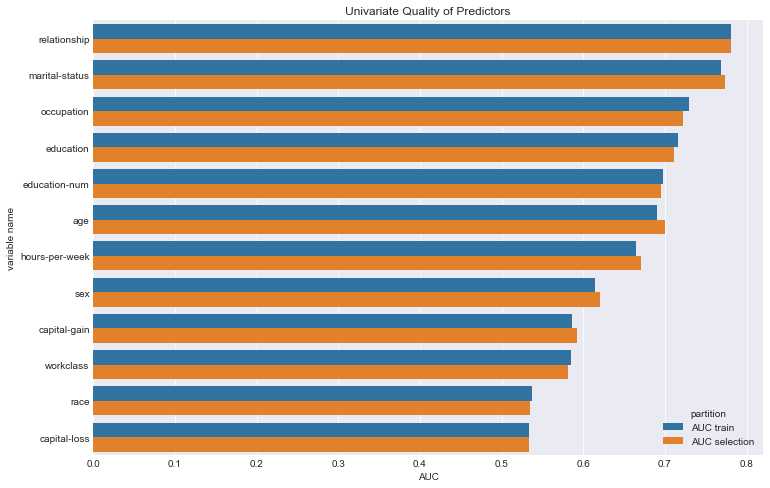

In [9]:
build.plotPredictorQuality(df_unisel,  #Dataframe with univariate selection
                          dim=(12,8))  #Size of the figure, if not specified, automatically set to (12,8)

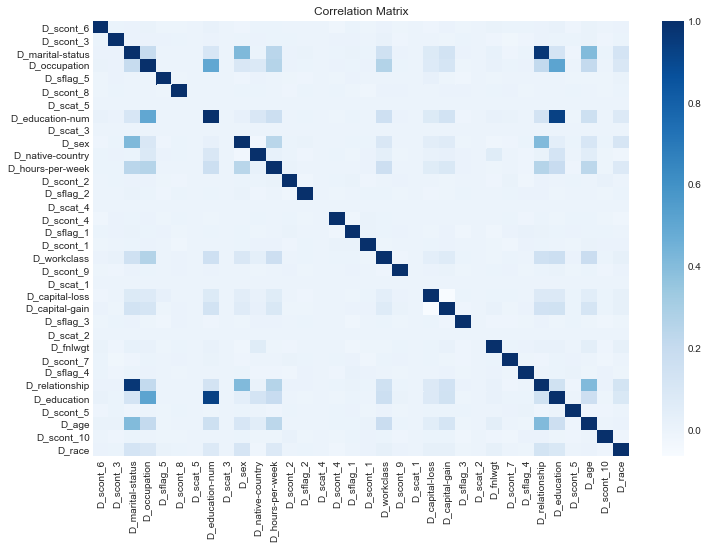

In [10]:
build.plotCorrMatrix(df_corr,    #Dataframe with correlation
                    dim=(12,8))  #Size of the figure, if not specified, automatically set to (12,8)

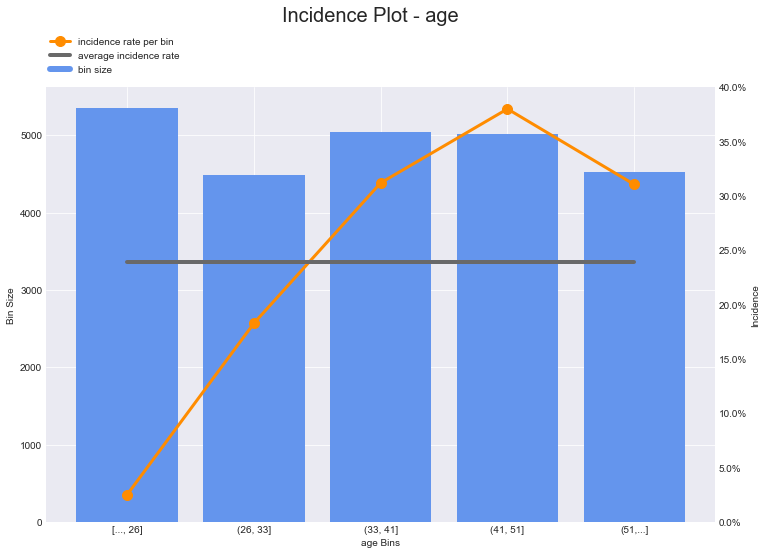

In [11]:
build.plotIncidence(df_transformed,  #Dataframe with transformed dataset
                    variable='age',  #Which variable should be visualized
                    dim=(12,8))      #Size of the figure, if not specified, automatically set to (12,8)

## <font color='blue'>Model building</font>
The next step is to find the best model. The library allows to build a model and specify which variables will be forced or excluded.

In [12]:
df_model1 = build.fit_model(df_transformed,                    #Dataframe with transformed data               
                            df_unisel,                         #Dataframe with univariate selection
                            modeling_nsteps=30,                #How many variables will be used for modelling
                            forced_vars=['scont_1','scont_2'], #List of variables forced to be in the models, list (or None))
                            excluded_vars=None,                #List of variables to be excluded, list (or None)
                            name='Experiment',                 #Name of the model
                            verbose=False,                     #Verbose=True will print extra output about skipped models
                            positive_only=True)                #positive_only=True [recommended, set automatically]:
                                                               #(whether only positive coeficients should be considered)

We can inspect what the output is. It contais all the necessary information about the model building:
  * model coefficients
  * predictors from forward selection
  * AUC performance on train/selection/validation set
  * cumulative response/gains
  * variable importance
  * etc.
  
Ever row contains one step in the forward selection process, thus one model with selected variables.

In [13]:
df_model1.head(n=5)

,step,coef,intercept,auc_train,auc_selection,auc_validation,predictors_subset,last_var_added,pred_training,pred_selection,pred_validation,cum_response,cum_gains,importance
0,1,[[4.8883387625778765]],[-2.326640746611817],0.510697,0.505875,0.502901,[D_scont_2],D_scont_2,"[[0.768583054973849, 0.231416945026151], [0.76...","[[0.768583054973849, 0.231416945026151], [0.76...","[[0.7638833845524492, 0.23611661544755083], [0...","[21.77, 24.49, 26.36, 26.58, 24.83, 25.11, 24....","[0, 0.91, 2.05, 3.31, 4.45, 5.19, 6.3, 7.04, 8...",{'scont_2': 0.9999602164427089}
1,2,"[[5.6064185594945055, 5.4040124941185645]]",[-3.792097034819709],0.515900,0.500047,0.495731,"[D_scont_2, D_scont_1]",D_scont_1,"[[0.762753676141239, 0.23724632385876096], [0....","[[0.762753676141239, 0.23724632385876096], [0....","[[0.7572651247462866, 0.24273487525371337], [0...","[38.78, 40.48, 40.91, 35.26, 28.24, 23.86, 20....","[0, 1.63, 3.39, 5.13, 5.9, 5.9, 5.99, 6.07, 7....","{'scont_2': 0.7487108741471443, 'scont_1': 0.6..."
2,3,"[[5.236067628970329, 5.8321544245240755, 6.589...",[-5.805207410483017],0.784975,0.779989,0.774255,"[D_scont_2, D_scont_1, D_relationship]",D_relationship,"[[0.5571763524627912, 0.4428236475372088], [0....","[[0.5571763524627912, 0.4428236475372088], [0....","[[0.5502313500711142, 0.4497686499288857], [0....","[43.54, 46.94, 45.68, 45.66, 44.75, 45.57, 45....","[0, 1.82, 3.93, 5.73, 7.64, 9.35, 11.43, 13.34...","{'scont_2': 0.03837649674025111, 'scont_1': 0...."
3,4,"[[5.829258106552866, 7.1572932587913565, 6.910...",[-7.817413679010036],0.858115,0.856198,0.853614,"[D_scont_2, D_scont_1, D_relationship, D_educa...",D_education,"[[0.07688945912663137, 0.9231105408733686], [0...","[[0.3481266903051372, 0.6518733096948628], [0....","[[0.3410603659913337, 0.6589396340086663], [0....","[82.99, 83.33, 81.59, 80.75, 78.17, 75.57, 74....","[0, 3.48, 6.99, 10.24, 13.52, 16.34, 18.96, 21...","{'scont_2': 0.02268402069355277, 'scont_1': 0...."
4,5,"[[6.308402146245059, 6.6555736472448945, 6.864...",[-8.726303718168493],0.871315,0.871706,0.868557,"[D_scont_2, D_scont_1, D_relationship, D_educa...",D_capital-gain,"[[0.09781071808143116, 0.9021892819185688], [0...","[[0.39754912429362177, 0.6024508757063782], [0...","[[0.3894682127983645, 0.6105317872016355], [0....","[94.56, 88.44, 86.36, 87.39, 84.04, 82.5, 79.7...","[0, 3.96, 7.41, 10.84, 14.63, 17.56, 20.7, 23....","{'scont_2': 0.024497630031203383, 'scont_1': 0..."


Clearly, we again need visual inspection. Therefore, below are plots for **AUC**, **Variable importance** and **Cumulative gain/response**.

AUC plots is supposed to help choosing optimal number of variables in the model. Further down, it needs to be specified which model should be used.

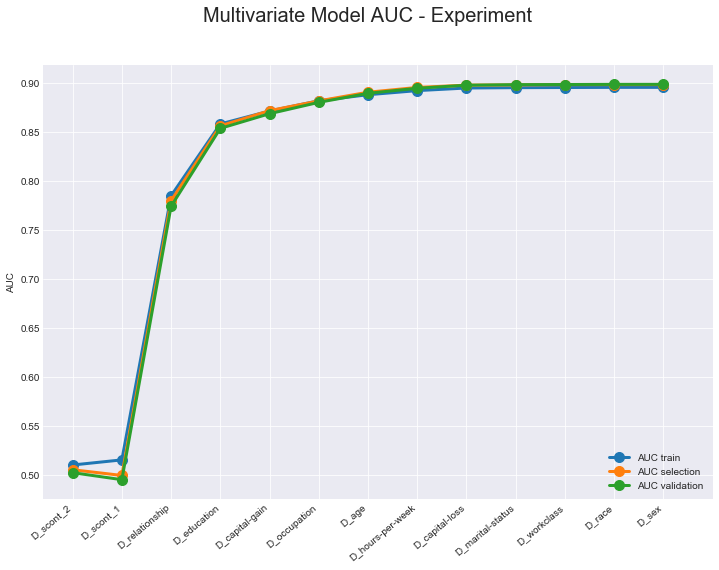

In [14]:
build.plotAUC(df=df_model1,  #Dataframe with models
             dim=(12,8))     #Size of the figure, if not specified, automatically set to (12,8)

For example below, we plot variable importance for 5th model with 5 variables.

Keep in mind that the `fit_model()` method will return multiple models, each with different set of variables.

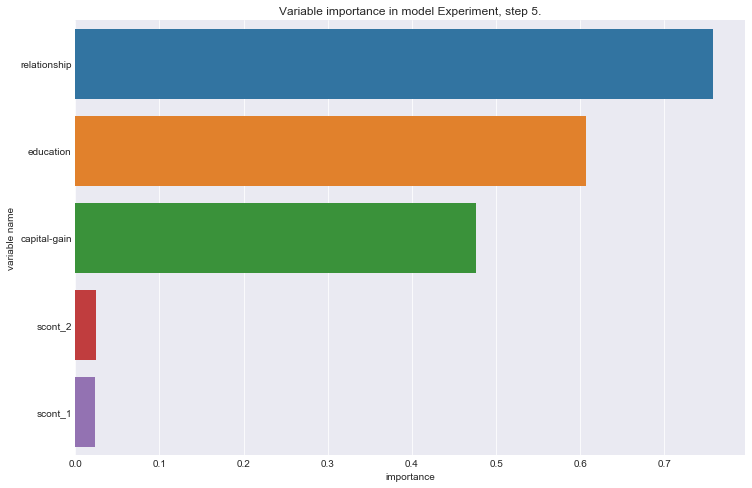

In [15]:
build.plotVariableImportance(df_model1,  #Dataframe with models
                             step=5,     #What model should be plotted
                             dim=(12,8)) #Size of the figure, if not specified, automatically set to (12,8)

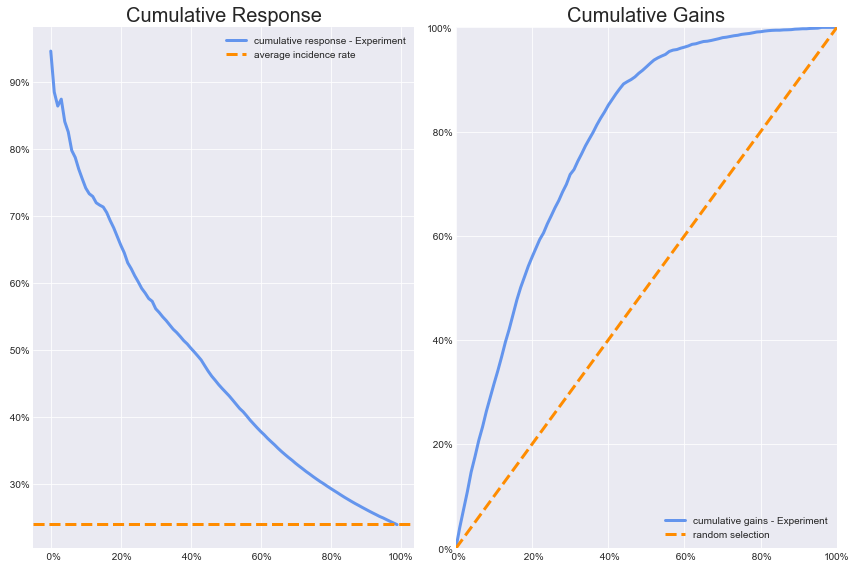

In [16]:
build.plotCumulatives([(df_model1,5)], #List of tuples (dataframe with models, model number)
                      df_transformed,  #Dataframe with transformed dataset
                      dim=(12,8))       #Size of the figure, if not specified, automatically set to (12,8)

After fitting the model, following class attributes are available

In [17]:
#Dictionary containing paritioned data in forms of dataframes
#partition_dict = build._partition_dict         
#print(partition_dict.values)

## <font color='blue'>Model comparison</font>
In the next step, the analyst needs to try different models. Thus, we can build multiple models and compare them. Below we build another two models and give them a name.

In [18]:
df_model2 = build.fit_model(df_transformed, 
                            df_unisel,
                            modeling_nsteps=30,
                            forced_vars=None,
                            excluded_vars=None,
                            name='All variables')

df_model3 = build.fit_model(df_transformed, 
                            df_unisel,
                            modeling_nsteps=5,
                            forced_vars=['capital-gain','hours-per-week'],
                            excluded_vars=['age','relationship', 'sex'],
                            name='Limited model')

And now we can compare all the three models as we are used to from the web version of COBRA - with **AUC comparison** and **Cumulative gains/response** plots.

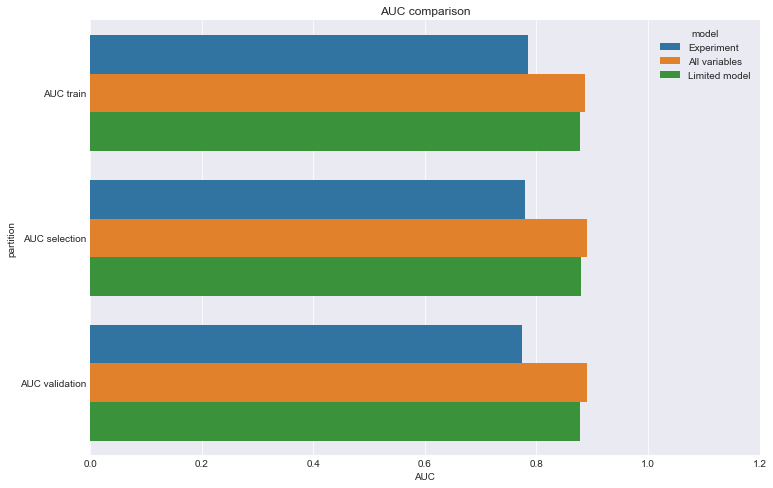

In [19]:
build.plotAUCComparison([(df_model1,3), (df_model2,5), (df_model3, 4)])

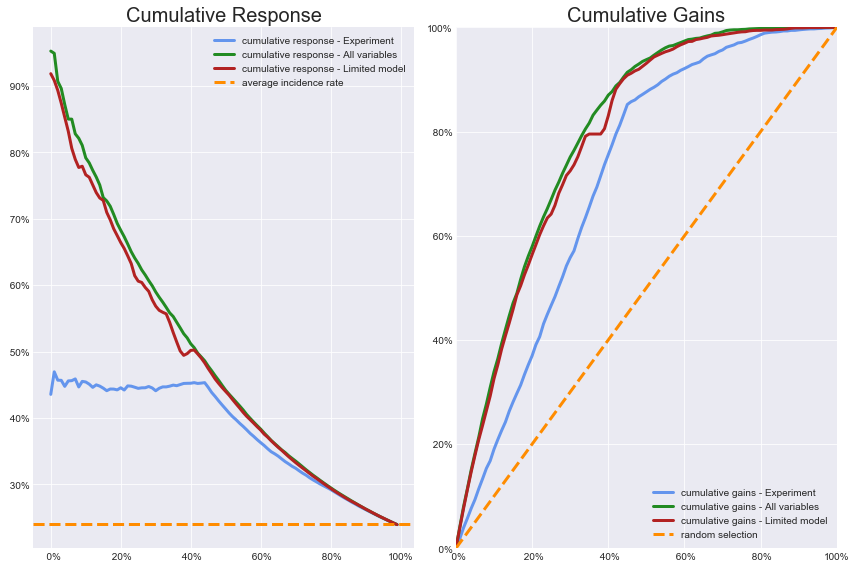

In [20]:
build.plotCumulatives([(df_model1,3), (df_model2,5), (df_model3, 4)], df_transformed)